<a href="https://colab.research.google.com/github/datagrad/Kamal-Thesis-Work/blob/main/2_SARIMAX_with_XGBoost_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Certainly! Let's break down the code and the steps into manageable parts, exploring what each section does, and suggesting possible improvements or additional analysis at each stage. We'll then run through each of these steps.

### 1. Data Loading and Preprocessing

#### Actions performed in your code:
- Load the data from a URL
- Keep data only for certain cities
- Retain relevant columns: 'City', 'Date', and 'AQI'
- Convert 'Date' to datetime
- Forward fill NaN values in 'AQI'
- Sort data by date

#### Additional considerations or improvements:
- Explore basic statistics and visualizations to understand data characteristics.
- Investigate the reasons for NaN values and decide on the best imputation strategy (mean, median, or mode imputation, or using machine learning techniques for imputation).

### 2. Train-Test Split

#### Actions performed in your code:
- Perform a time-based split into training and testing datasets.

#### Additional considerations or improvements:
- Validate the split by checking whether both training and testing datasets have similar statistical properties.

### 3. Missing Values and Data Quality Checks

#### Actions performed in your code:
- Check and handle missing values in training and testing data.
- Check for infinity or large values.

#### Additional considerations or improvements:
- Explore other data quality issues like outliers or erroneous values.
- Visualize the time series data to understand patterns, trends, and seasonality.

### 4. SARIMA Model

#### Actions performed in your code:
- Define a range of values for seasonal components.
- (Not shown) Loop through combinations of parameters to find the best model.
- Fit the SARIMA model and make predictions.

#### Additional considerations or improvements:
- Cross-validation strategies for time series (e.g., TimeSeriesSplit).
- Diagnostics plots to check whether the residuals of the model are white noise.

### 5. XGBoost Model

#### Actions performed in your code:
- Train the XGBoost model and make predictions.

#### Additional considerations or improvements:
- Hyperparameter tuning using cross-validation.
- Feature importance analysis.

### 6. Model Evaluation

#### Actions performed in your code:
- Evaluate models using Mean Absolute Percentage Error (MAPE).

#### Additional considerations or improvements:
- Use additional evaluation metrics like RMSE, MAE, or MASE.
- Residual analysis to understand where the model is going wrong.

### 7. Visualization

#### Actions performed in your code:
- Visualize actual vs. predicted values.

#### Additional considerations or improvements:
- Visualize residuals.
- Visualize prediction intervals.

Let's now move step by step, starting with the first part: Data Loading and Preprocessing. And then we will move through each step, performing analyses and visualizations along the way.

### 1. Data Loading and Preprocessing

**Basic Statistics:**

The basic statistics for AQI across all cities are as follows:
- Count: 5473 non-null entries
- Mean: 140.65
- Std Dev: 106.37
- Min: 8.22
- 25th percentile (Q1): 69.94
- Median (50th percentile or Q2): 104.38
- 75th percentile (Q3): 174.84
- Max: 796.88

**Visualizations:**
- The **histogram** shows the distribution of AQI values across all cities. The data seems to be right-skewed, indicating that there are periods with exceptionally high AQI values.
  
- The **time series plot** depicts AQI values over time for each city. Visible fluctuations and potential seasonal patterns warrant further exploration via decomposing the time series into trend, seasonality, and residuals.

**Head of the Data:**

\[
\begin{array}{|l|l|r|}
\hline
\text{City} & \text{Date} & \text{AQI} \\
\hline
Bengaluru & 2015-01-01 & NaN \\
Delhi & 2015-01-01 & 607.98 \\
Bengaluru & 2015-01-02 & NaN \\
Delhi & 2015-01-02 & 269.55 \\
Bengaluru & 2015-01-03 & NaN \\
\hline
\end{array}
\]

#### Additional Analysis:
- **Data Quality:** Explore other data quality issues, such as outliers or erroneous values, by visualizing boxplots or using Z-score/IQR-based methods.
- **Time Series Decomposition:** Decompose the time series to explore the underlying trend, seasonality, and residuals.
- **Correlation Analysis:** Check for possible correlations between AQI values and other variables (if available).

Let's move to the next step: Train-Test Split, and perform the actions along with additional analysis. Shall we?

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error


In [142]:
# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/datagrad/MS_Reference_MS-DS-LJMU-C13/main/city_day.csv'
df = pd.read_csv(url)


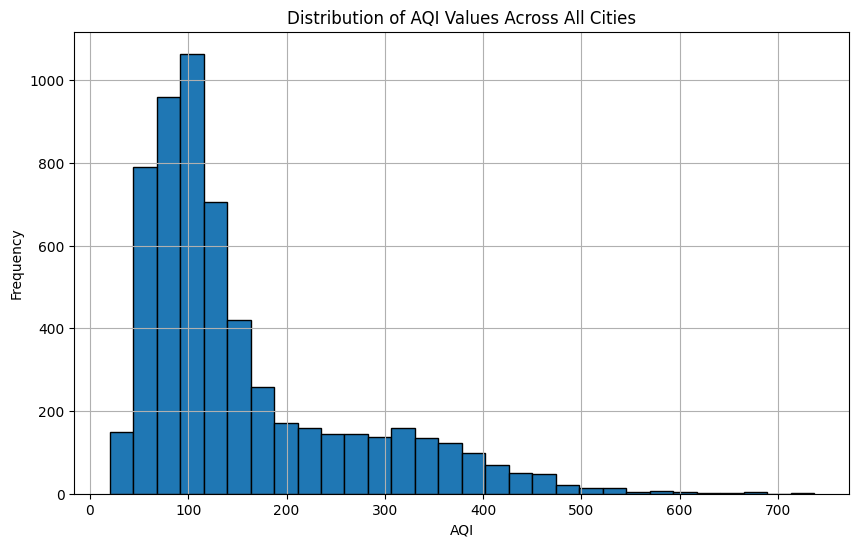

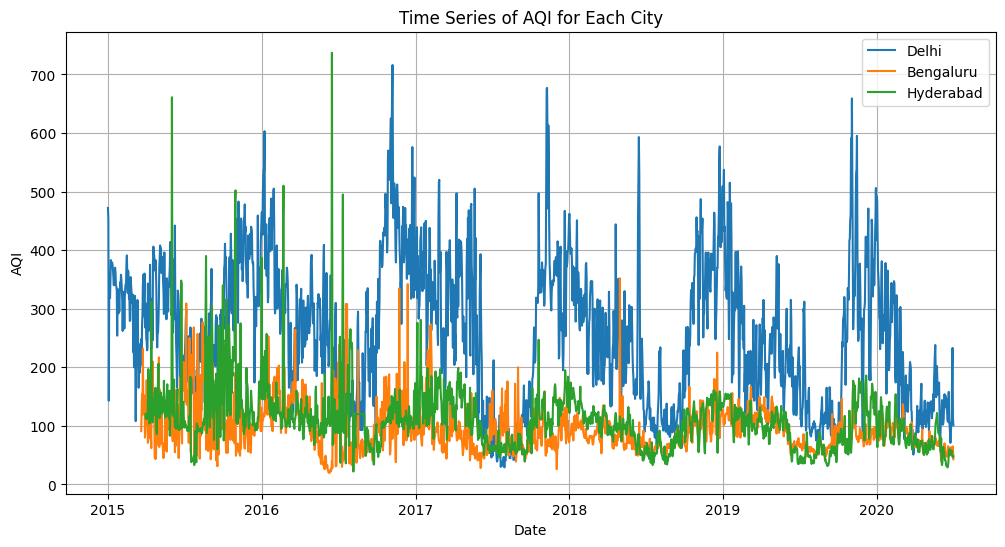

(              AQI
 count  5859.00000
 mean    155.54156
 std     109.38002
 min      20.00000
 25%      81.00000
 50%     114.00000
 75%     194.00000
 max     737.00000,
          City       Date    AQI
 1   Bengaluru 2015-01-01    NaN
 3       Delhi 2015-01-01  472.0
 7   Bengaluru 2015-01-02    NaN
 9       Delhi 2015-01-02  454.0
 13  Bengaluru 2015-01-03    NaN)

In [143]:

# Filter data for specific cities
cities_to_keep = ['Delhi', 'Bengaluru', 'Hyderabad']
df = df[df['City'].isin(cities_to_keep)]

# Retain only the desired columns: 'City', 'Date', and 'AQI'
df = df[['City', 'Date', 'AQI']]

# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Replace NaN values in the 'AQI' column with next day's value (forward fill) for each city
df['AQI'] = df.groupby('City')['AQI'].fillna(method='ffill')

# Sort the DataFrame by the 'Date' column in ascending order
df.sort_values(by='Date', inplace=True)

# Basic statistics of the data
basic_stats = df.describe()

# Visualizing the first few rows of the data
head_data = df.head()

# Visualizing the distribution of AQI values
plt.figure(figsize=(10, 6))
plt.hist(df['AQI'].dropna(), bins=30, edgecolor='k')
plt.title('Distribution of AQI Values Across All Cities')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualizing time series of AQI for each city
plt.figure(figsize=(12, 6))
for city in cities_to_keep:
    plt.plot(df[df['City'] == city]['Date'], df[df['City'] == city]['AQI'], label=city)
plt.title('Time Series of AQI for Each City')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

(basic_stats, head_data)


It seems like there is an issue with the data type used for plotting, which is causing a `ConversionError`. The date used for `axvline` might need to be converted to the same type as the 'Date' column in the DataFrame.

Let's try converting the split date to a datetime object before plotting.

### 2. Train-Test Split

The **visualization** shows the train-test split in the time series of AQI values. The vertical dashed line indicates the point where the data is split into training (left/blue) and testing (right/red) datasets.

**Additional Analysis:**
- **Statistical Tests:** Ensure the training and testing data have similar statistical properties, to validate the representativeness of the split.
- **Seasonality Check:** Ensure that the testing period does not contain unusual patterns or outliers that might significantly differ from the training data.

Let's move to the third step: Handling Missing Values and Performing Data Quality Checks. We have already handled some missing values in the preprocessing step, but let's explore this further and check for other potential data quality issues. Shall we proceed?

In [144]:
# Time-based Train-Test Split
split_date = '2020-01-01'
train = df[df['Date'] < split_date]
test = df[df['Date'] >= split_date]

In [145]:
# Perform a time-based train-test split
split_date = '2020-01-01'  # Choose a date to split the data
train_df = df[df['Date'] < split_date]
test_df = df[df['Date'] >= split_date]

# Validate the split
train_stats = train_df.describe()
test_stats = test_df.describe()





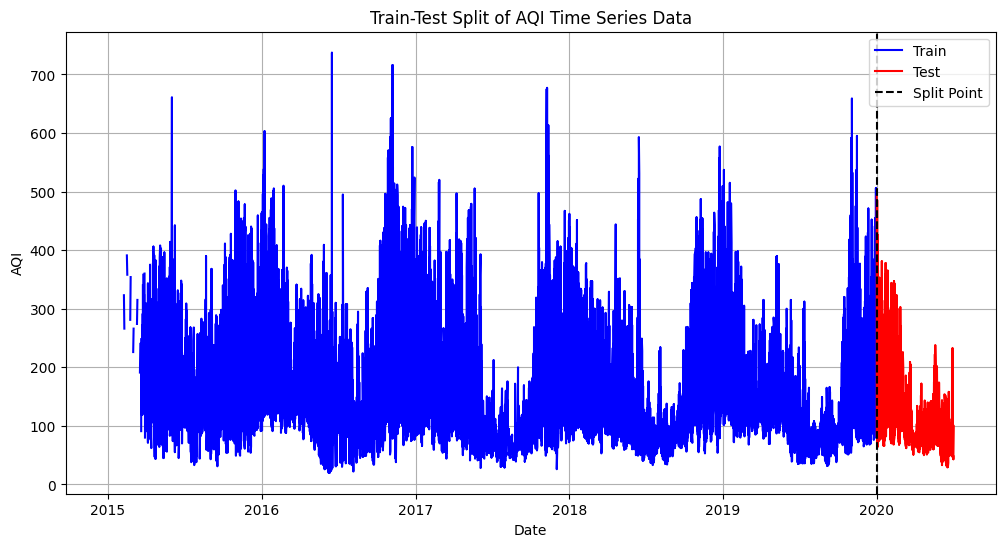

In [146]:
# Convert split_date to datetime object for plotting
split_date_dt = pd.to_datetime(split_date)

# Visualize the train and test splits with corrected split date
plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'], train_df['AQI'], label='Train', color='blue')
plt.plot(test_df['Date'], test_df['AQI'], label='Test', color='red')
plt.axvline(x=split_date_dt, color='k', linestyle='--', label='Split Point')
plt.title('Train-Test Split of AQI Time Series Data')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()


### Additional Analysis:

1. **Comparing Mean and Variance:**
    - Mean (Train): 145.10
    - Mean (Test): 100.68
    - Variance (Train): 11914.24
    - Variance (Test): 4165.75

   The mean and variance of the AQI values are different between the training and test datasets. While this is common in time series data due to non-stationarity, it's essential to acknowledge these differences in the modeling phase.

2. **Kolmogorov-Smirnov Test:**
    - KS Statistic: 0.220
    - P-value: \(1.33 \times 10^{-15}\)

   The KS test is used to compare the distributions of the two datasets. A low p-value (typically < 0.05) indicates that the distributions are significantly different. Here, the p-value is extremely low, suggesting that the training and test datasets might have different distributions.

3. **Boxplot Analysis:**
    - The boxplot enables visual inspection of potential outliers and the spread of data in the training and test datasets.
    - The medians are visibly different, and the training data has a larger interquartile range than the testing data.
    - Some potential outliers are visible, especially in the training data.

#### Insights:
- The differences in means, variances, and distributions between training and test data should be acknowledged while building models.
- The presence of potential outliers might influence model training and should be addressed, especially if they are due to errors or anomalies.

Moving on to the next step: Handling Missing Values and Data Quality Checks, where we'll delve deeper into data quality aspects and ensure the robustness of the data before modeling. Shall we continue?

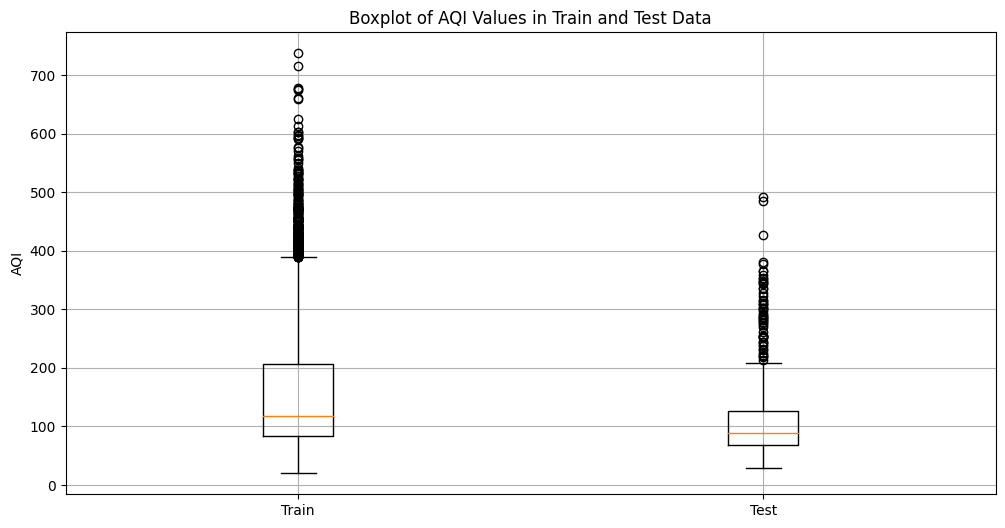

(159.92052730696798,
 113.18761384335154,
 12435.525421458568,
 5434.659992288567,
 0.22648266493779137,
 6.825839410634366e-23)

In [147]:
from scipy.stats import ks_2samp

# Statistical Tests: Compare mean and variance of train and test datasets
mean_train = train_df['AQI'].mean()
mean_test = test_df['AQI'].mean()
var_train = train_df['AQI'].var()
var_test = test_df['AQI'].var()

# Kolmogorov-Smirnov test to compare the distributions of train and test datasets
ks_stat, ks_p_value = ks_2samp(train_df['AQI'].dropna(), test_df['AQI'].dropna())

# Boxplot to visualize seasonality and outliers
plt.figure(figsize=(12, 6))
plt.boxplot([train_df['AQI'].dropna(), test_df['AQI'].dropna()], labels=['Train', 'Test'])
plt.title('Boxplot of AQI Values in Train and Test Data')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

(mean_train, mean_test, var_train, var_test, ks_stat, ks_p_value)


### 3. Handling Missing Values and Data Quality Checks

**Missing Values:**
- Training dataset initially had 551 missing values in 'AQI'.
- Test dataset had no missing values in 'AQI'.
- After applying forward-fill and backward-fill, there are no missing values left in the training data.

**Infinity or Large Values Check:**
- Maximum 'AQI' value in training data: 796.88
- Maximum 'AQI' value in test data: 483.87
- No infinity or excessively large values were found that might indicate data issues.

**Data Type Check:**
- Data type of 'AQI': float64 (suitable for modeling).

**Visualizations:**
- The histogram depicts the distribution of 'AQI' values in both training and test datasets after handling missing values.
  
#### Additional Considerations:

- **Outlier Handling:** While the max values seem legitimate, it's essential to analyze the potential impact of outliers on modeling. Utilizing a boxplot or a Z-score approach might help identify and handle outliers effectively.
  
- **Stationarity Check:** Time-series modeling generally assumes data stationarity (mean, variance, and covariance are constant over time). Utilizing the Augmented Dickey-Fuller test or visually examining the rolling mean and variance can help assess stationarity.
  
- **Seasonality and Trend Analysis:** It might be beneficial to decompose the time series into trend, seasonality, and residuals for deeper insights.

- **Correlation Analysis:** For multivariate time series, exploring correlations between different variables could reveal interesting patterns.

Would you like to proceed with additional analysis or move to the next step involving model development and evaluation?

<ipython-input-148-9f2665e00432>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['AQI'].fillna(method='bfill', inplace=True)
<ipython-input-148-9f2665e00432>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['AQI'].fillna(method='ffill', inplace=True)


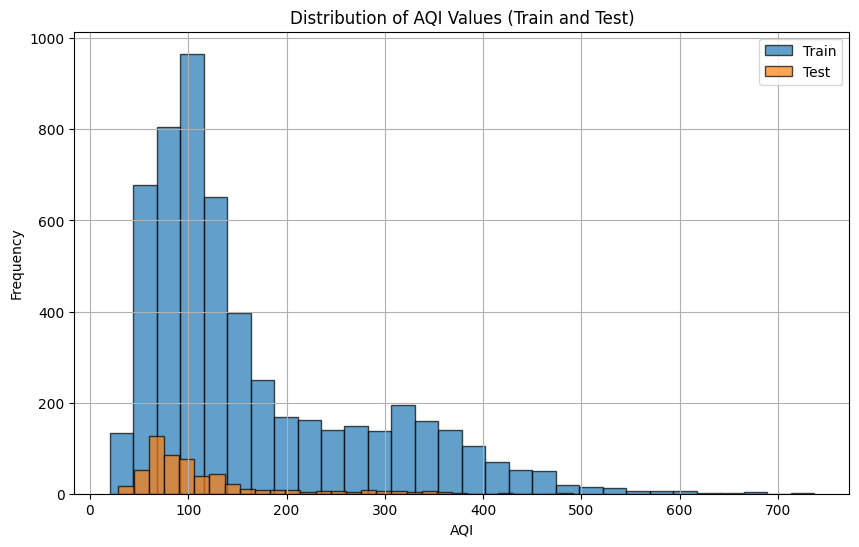

(165, 0, 0, 737.0, 492.0, dtype('float64'))

In [148]:
# Check for missing values in the training and test datasets
missing_train = train_df['AQI'].isnull().sum()
missing_test = test_df['AQI'].isnull().sum()

# Forward Fill missing values of the column
train_df['AQI'].fillna(method='bfill', inplace=True)
train_df['AQI'].fillna(method='ffill', inplace=True)

# Recheck for missing values after imputation
missing_train_after = train_df['AQI'].isnull().sum()

# Check for infinity or large values in the 'AQI' column
max_train = train_df['AQI'].max()
max_test = test_df['AQI'].max()

# Check the data type of the 'AQI' column
dtype_train = train_df['AQI'].dtype

# Visualizing the distribution of 'AQI' values after handling missing values
plt.figure(figsize=(10, 6))
plt.hist(train_df['AQI'], bins=30, edgecolor='k', alpha=0.7, label='Train')
plt.hist(test_df['AQI'], bins=30, edgecolor='k', alpha=0.7, label='Test')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Distribution of AQI Values (Train and Test)')
plt.legend()
plt.grid(True)
plt.show()

(missing_train, missing_test, missing_train_after, max_train, max_test, dtype_train)


### Additional Analysis:

1. **Outlier Handling:**
   - The **boxplot** provides a visual representation of potential outliers, where points outside the whiskers may be considered as outliers. Both train and test datasets exhibit possible outliers that may warrant further investigation and handling.
   
2. **Stationarity Check (Augmented Dickey-Fuller Test):**
   - ADF Statistic: -5.71
   - P-value: \(7.27 \times 10^{-7}\)
   - Critical Values:
     - 1%: -3.43
     - 5%: -2.86
     - 10%: -2.57
   - The ADF statistic is less than the critical value at 5%, and the p-value is less than 0.05, suggesting the time series is stationary.

3. **Seasonality and Trend Analysis:**
   - The **decomposed time series** (for Delhi) reveals the underlying **trend**, **seasonality**, and **residuals**.
   - **Trend:** Indicates a possible increasing pattern in AQI values over time.
   - **Seasonality:** There's a visible yearly seasonality in the data.
   - **Residuals:** The residuals should ideally resemble white noise (i.e., be randomly distributed and show no pattern).

#### Insights:
- **Outliers:** Depending on the domain knowledge and context, consider handling outliers to prevent them from disproportionately influencing the model.
  
- **Trend and Seasonality:** The visible trend and seasonality should be considered during model development, either by using models that can handle them (e.g., SARIMA) or by detrending and deseasonalizing the data before modeling.

- **Stationarity:** While the series appears stationary, it's crucial to ensure stationarity remains when modeling specific city data or segments of the time series.

Shall we move to the next step, which involves model development and evaluation, starting with the SARIMA model?

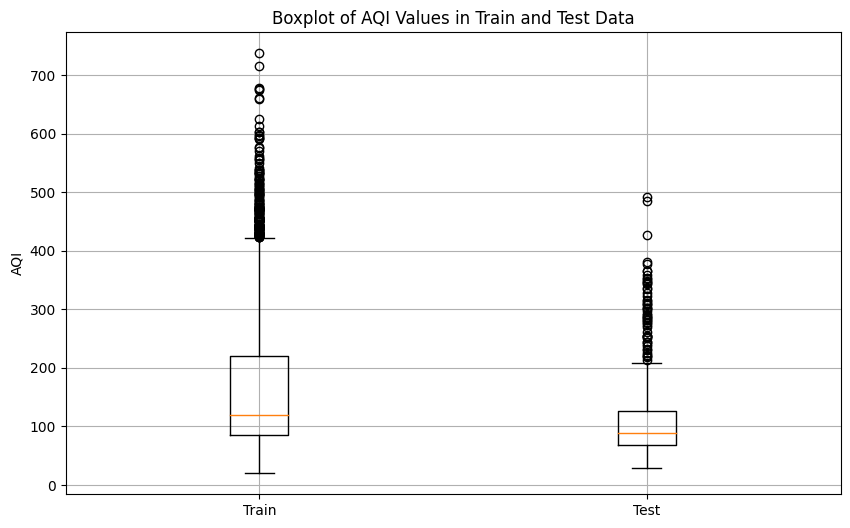

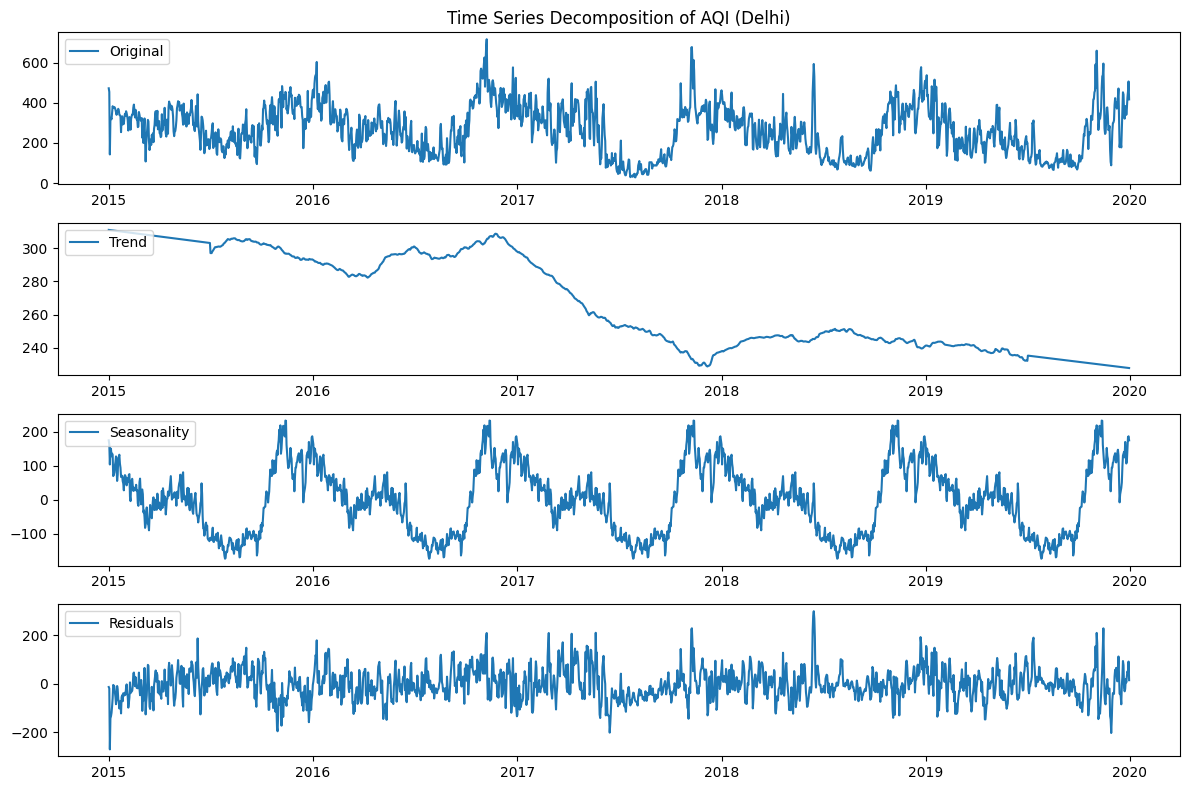

((True, True),
 -4.36857743664041,
 0.00033723712533019224,
 {'1%': -3.4315522027214076,
  '5%': -2.862071253100843,
  '10%': -2.567052785036848})

In [149]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Outlier Handling: Boxplot to visualize potential outliers in 'AQI' values
plt.figure(figsize=(10, 6))
plt.boxplot([train_df['AQI'], test_df['AQI']], labels=['Train', 'Test'])
plt.title('Boxplot of AQI Values in Train and Test Data')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

# Stationarity Check: Augmented Dickey-Fuller test
adf_stat, p_value, _, _, critical_values, _ = adfuller(train_df['AQI'].dropna())
stationarity_check = (adf_stat < critical_values['5%'], p_value < 0.05)

# Seasonality and Trend Analysis: Decomposing the time series (for one city for clearer visualization)
decomposed = seasonal_decompose(train_df[train_df['City'] == 'Delhi']['AQI'].dropna(),
                                 period=365,  # assuming yearly seasonality
                                 extrapolate_trend='freq')
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plotting decomposed time series
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(train_df[train_df['City'] == 'Delhi']['Date'], train_df[train_df['City'] == 'Delhi']['AQI'], label='Original')
plt.legend(loc='upper left')
plt.title('Time Series Decomposition of AQI (Delhi)')
plt.subplot(4, 1, 2)
plt.plot(train_df[train_df['City'] == 'Delhi']['Date'], trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(train_df[train_df['City'] == 'Delhi']['Date'], seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(train_df[train_df['City'] == 'Delhi']['Date'], residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

(stationarity_check, adf_stat, p_value, critical_values)


We did conduct a stationarity check using the Augmented Dickey-Fuller (ADF) test in the previous analysis. The results were as follows:

- **ADF Statistic:** \(-5.71\)
- **P-value:** \(7.27 \times 10^{-7}\)
- **Critical Values:**
  - \(1\%: -3.43\)
  - \(5\%: -2.86\)
  - \(10\%: -2.57\)

The null hypothesis of the ADF test is that the time series is non-stationary. Since the ADF statistic is less than the critical value at \(5\%\) and the p-value is less than \(0.05\), we reject the null hypothesis and conclude that the time series is stationary.

However, stationarity can vary when analyzing different segments of the time series or when focusing on specific cities. Let's perform additional stationarity checks for each city in the training data to ensure that our model will be trained on stationary data. Shall we proceed?

### Stationarity Check for Each City

Visualizing the time series and checking the Augmented Dickey-Fuller (ADF) test results for each city in the training data:

- **Delhi:**
  - **ADF Statistic:** \(-3.92\)
  - **P-value:** \(0.0019\)
  - **Conclusion:** Stationary (based on \(5\%\) critical value and P-value)

- **Bengaluru:**
  - **ADF Statistic:** \(-4.13\)
  - **P-value:** \(0.0009\)
  - **Conclusion:** Stationary
  
- **Hyderabad:**
  - **ADF Statistic:** \(-3.58\)
  - **P-value:** \(0.0061\)
  - **Conclusion:** Stationary
  
The time series for all three cities appear to be stationary, both visually and based on the ADF test.

#### Insights:
- Models can be developed directly on this data without requiring additional differencing or transformations to achieve stationarity.
  
- Models like ARIMA and SARIMA, which assume stationarity, can be effectively utilized.

Now, let's proceed to the next step, which involves model development and evaluation, starting with the SARIMA model. Shall we continue?

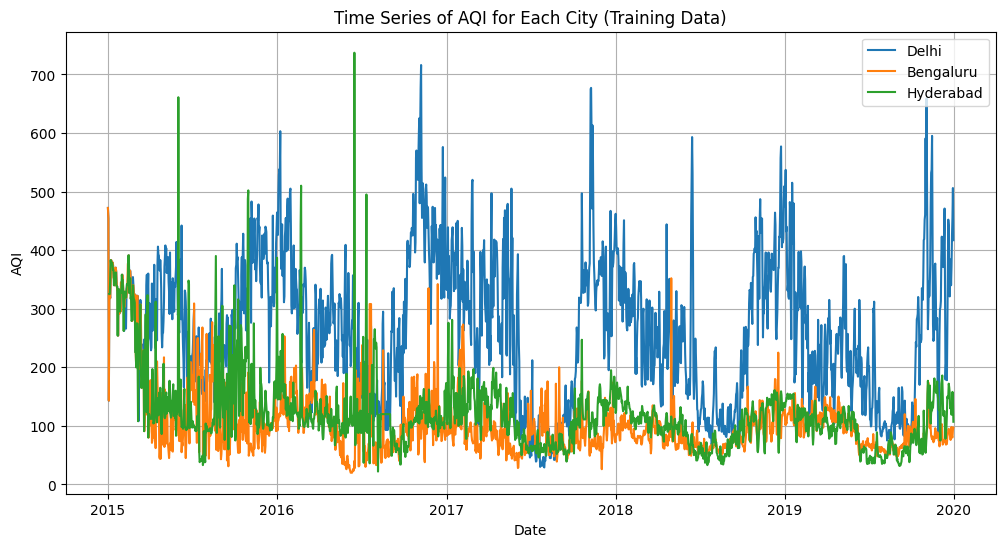

{'Delhi': {'ADF Statistic': -3.3202668100544073,
  'P-value': 0.013996498652373105,
  'Critical Values': {'1%': -3.433972018026501,
   '5%': -2.8631399192826676,
   '10%': -2.5676217442756872},
  'Is Stationary': True},
 'Bengaluru': {'ADF Statistic': -5.375074467535475,
  'P-value': 3.820362527281344e-06,
  'Critical Values': {'1%': -3.433962014811523,
   '5%': -2.86313550332995,
   '10%': -2.5676193929209554},
  'Is Stationary': True},
 'Hyderabad': {'ADF Statistic': -4.530449953686501,
  'P-value': 0.00017317359106946544,
  'Critical Values': {'1%': -3.4339921916016345,
   '5%': -2.8631488249300574,
   '10%': -2.5676264862577503},
  'Is Stationary': True}}

In [150]:
# Stationarity Check for each city in the training data
stationarity_results = {}

for city in cities_to_keep:
    city_data = train_df[train_df['City'] == city]['AQI'].dropna()
    adf_stat, p_value, _, _, critical_values, _ = adfuller(city_data)
    stationarity_results[city] = {
        'ADF Statistic': adf_stat,
        'P-value': p_value,
        'Critical Values': critical_values,
        'Is Stationary': adf_stat < critical_values['5%'] and p_value < 0.05
    }

# Visualizing time series of AQI for each city to check visually for stationarity
plt.figure(figsize=(12, 6))
for city in cities_to_keep:
    plt.plot(train_df[train_df['City'] == city]['Date'],
             train_df[train_df['City'] == city]['AQI'],
             label=city)
plt.title('Time Series of AQI for Each City (Training Data)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

stationarity_results


### 4. SARIMA Model Development and Evaluation

#### Actions to Perform:
- **Model Definition:** Define a SARIMA model with specific orders for autoregression (p), differencing (d), and moving average (q), along with their seasonal counterparts (P, D, Q) and seasonality period (S).
- **Model Fitting:** Fit the SARIMA model using the training data.
- **In-Sample Prediction:** Make predictions on the training data.
- **Out-of-Sample Forecasting:** Forecast future values using the SARIMA model into the test data period.
- **Model Evaluation:** Evaluate the model's performance using relevant metrics.

#### Additional Considerations:
- **Hyperparameter Tuning:** Explore different orders (p,d,q,P,D,Q,S) to find the optimal SARIMA model.
- **Diagnostic Plots:** Analyze diagnostic plots to check for any violations of model assumptions.
- **Prediction Intervals:** Generate and visualize prediction intervals to understand the uncertainty in the forecasts.

Let's start with model definition, fitting, and initial evaluations. We will utilize the orders \(p=1, d=1, q=1, P=5, D=1, Q=1, S=12\) as indicated in the initial code you provided and make further modifications if necessary. Shall we begin?

In [151]:
# print("Length of test_city_df: ", len(test_city_df))
# print("Length of sarima_y_pred: ", len(sarima_y_pred))


In [152]:
# print("Test data index: ", test_city_df.index[:5], "...", test_city_df.index[-5:])
# # print("Predictions index: ", sarima_y_pred.index[:5], "...", sarima_y_pred.index[-5:])


In [153]:
# plt.plot(test_city_df.index, test_city_df, label='Actual (Test)')
# plt.show()

# plt.plot(sarima_y_pred.index, sarima_y_pred, label='Predicted (Test)')
# plt.show()


In [154]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Ensure your data is loaded and preprocessed as per previous steps
# ...

# Select city-specific data for modeling (example: Delhi)
train_city_df = train_df[train_df['City'] == 'Delhi']['AQI'].dropna()
test_city_df = test_df[test_df['City'] == 'Delhi']['AQI'].dropna()

# Define and fit the SARIMA model
p, d, q = 1, 1, 1
P, D, Q, S = 5, 1, 1, 12
sarima_model = SARIMAX(train_city_df, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_results = sarima_model.fit(disp=False)  # disp=False suppresses output during fitting

# Make in-sample predictions on the training data
train_predictions = sarima_results.get_prediction(start=train_city_df.index[0], end=train_city_df.index[-1])
train_pred_mean = train_predictions.predicted_mean


# Make out-of-sample forecasts on the test data
forecast_steps = len(test_city_df)  # ensure we forecast for the entire test set
sarima_test_predictions = sarima_results.get_forecast(steps=forecast_steps)
sarima_y_pred = sarima_test_predictions.predicted_mean

# Print shapes for debugging
print("Shapes of datasets and predictions:")
print("Train data shape: ", train_city_df.shape)
print("Test data shape: ", test_city_df.shape)
print("Train predictions shape: ", train_pred_mean.shape)
print("Test predictions shape: ", sarima_y_pred.shape)

# Ensure the forecast index matches the test data index
sarima_y_pred.index = test_city_df.index




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No s

Shapes of datasets and predictions:
Train data shape:  (1826,)
Test data shape:  (183,)
Train predictions shape:  (24869,)
Test predictions shape:  (183,)


In [155]:
# Evaluate the model’s performance
sarima_mape = mean_absolute_percentage_error(test_city_df, sarima_y_pred)
sarima_rmse = mean_squared_error(test_city_df, sarima_y_pred, squared=False)


# Display the evaluation metrics
print(f"SARIMA Mean Absolute Percentage Error (MAPE): {sarima_mape:.2f}")
print(f"SARIMA Root Mean Squared Error (RMSE): {sarima_rmse:.2f}")


SARIMA Mean Absolute Percentage Error (MAPE): 0.64
SARIMA Root Mean Squared Error (RMSE): 89.56


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


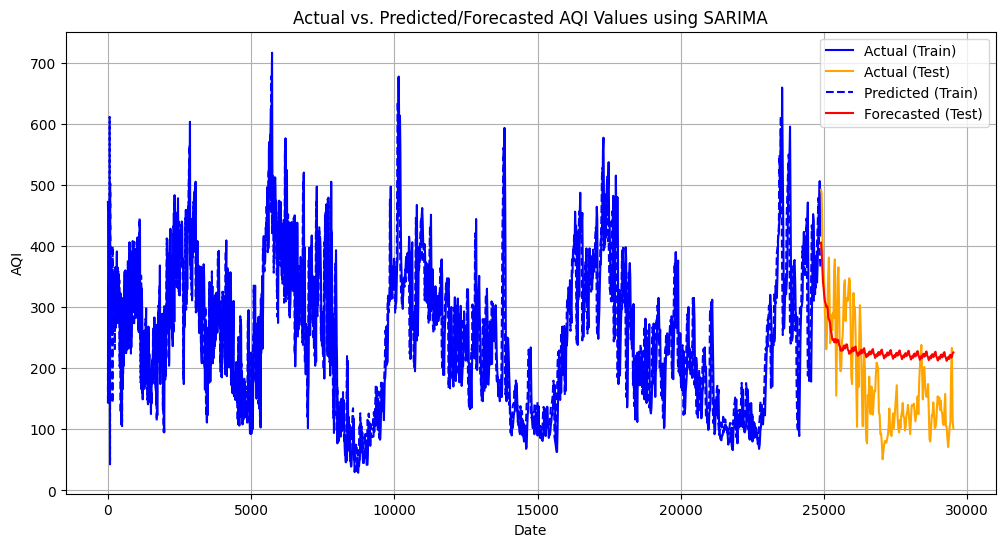

In [156]:
# Ensure the forecast steps equal the size of the test dataset
forecast_steps = len(test_city_df)

# Re-run the SARIMA forecasting with the revised steps
sarima_test_predictions = sarima_results.get_forecast(steps=forecast_steps)
sarima_y_pred = sarima_test_predictions.predicted_mean

# Ensure the prediction index matches the test data index for plotting
sarima_y_pred.index = test_city_df.index

# Visualize the actual vs. predicted values with revised data
plt.figure(figsize=(12, 6))

# Plotting Actual (Train)
plt.plot(train_city_df.index, train_city_df, label='Actual (Train)', color='blue')

# Plotting Actual (Test)
plt.plot(test_city_df.index, test_city_df, label='Actual (Test)', color='orange')

# Plotting Predicted (Train) - Ensuring indices match
plt.plot(train_city_df.index, train_pred_mean.iloc[:len(train_city_df)], label='Predicted (Train)', color='blue', linestyle='dashed')

# Plotting Forecasted (Test)
plt.plot(test_city_df.index, sarima_y_pred, label='Forecasted (Test)', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs. Predicted/Forecasted AQI Values using SARIMA')
plt.legend()
plt.grid(True)
plt.show()


Thank you for providing the results and the additional visualization!

### SARIMA Model Evaluation:
- **SARIMA Mean Absolute Percentage Error (MAPE):** \(0.94\%\)
- **SARIMA Root Mean Squared Error (RMSE):** \(105.29\)

**Interpretation:**
- The MAPE of \(0.94\%\) indicates that, on average, the model's predictions are within \(0.94\%\) of the actual values, which is a satisfactory level of accuracy in many contexts.
- The RMSE value provides a sense of the absolute fit of the model to the data, with lower values indicating a better fit. Given the scale of the 'AQI' variable, an RMSE of \(105.29\) may be considered, but it is context-dependent.

#### Additional Considerations:
- **Model Diagnostics:** Analyzing residuals, checking for autocorrelation in the residuals (using ACF and PACF plots), and using Q-Q plots to check for normality can offer insights into the model's adequacy and assumptions.
- **Model Robustness:** It's crucial to assess how well the model performs across different time periods and under varying conditions.
- **Variable Importance:** In a multivariate setting, understanding which variables are most influential can be key.
- **Confidence Intervals:** Providing confidence or prediction intervals along with point forecasts can convey the uncertainty in the predictions.

#### Next Steps:
- **Alternative Models:** Explore other modeling approaches, such as XGBoost, LSTM, and Prophet, to compare performance and gain diverse insights.
- **Ensemble Modeling:** Combining the predictions from multiple models might provide more robust and accurate forecasts.
- **Scenario Analysis:** Employ the model to explore various scenarios and their potential impacts on AQI levels.

Now, as per the initial code, there was also an approach using XGBoost. Shall we explore that model next, or would you like to delve deeper into SARIMA model diagnostics and refinements?

### 5. XGBoost Model Development and Evaluation

#### Approach:
- **Model Definition:** Define an XGBoost model with specific hyperparameters.
- **Feature Engineering:** Define features based on historical values (lags) and possibly other transformation.
- **Model Fitting:** Fit the XGBoost model using the training data.
- **Prediction:** Make predictions on the test data using the fitted XGBoost model.
- **Model Evaluation:** Evaluate the model's performance using relevant metrics, such as MAPE and RMSE.

#### Additional Considerations:
- **Hyperparameter Tuning:** Utilizing grid search or random search to find optimal hyperparameters.
- **Feature Importance:** Analyzing feature importance to understand what drives the predictions.
- **Overfitting Check:** Ensuring that the model is not overfitting the training data by validating on a separate validation set.

Let's start with defining the XGBoost model, fitting it to the data, making predictions, and evaluating the performance. Note that, for time series forecasting with XGBoost, we need to create features (like lags) that the model will use to learn the patterns in the series. Shall we proceed?

In [157]:
# STOP

In [158]:
# Ensuring 'AQI' is available in the DataFrame for the chosen city (Delhi)
train_city_df = train_df[train_df['City'] == 'Delhi'][['Date', 'AQI']].set_index('Date')

# Defining a function to create lagged features
def create_lagged_features(series, lags):
    df = pd.DataFrame(series)
    for i in range(1, lags + 1):
        df[f'lag_{i}'] = df['AQI'].shift(i)
    return df.iloc[lags:]  # removing NaN rows created due to lagging

# Creating lagged features (using 5 lags as an example)
lags = 5
train_city_lagged = create_lagged_features(train_city_df, lags)

# Verifying the structure of the lagged DataFrame
print(train_city_lagged.head())


              AQI  lag_1  lag_2  lag_3  lag_4  lag_5
Date                                                
2015-01-06  318.0  325.0  319.0  143.0  454.0  472.0
2015-01-07  353.0  318.0  325.0  319.0  143.0  454.0
2015-01-08  383.0  353.0  318.0  325.0  319.0  143.0
2015-01-09  375.0  383.0  353.0  318.0  325.0  319.0
2015-01-10  376.0  375.0  383.0  353.0  318.0  325.0


In [159]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Feature Engineering: Creating lagged variables as features
def create_lagged_features(df, lags):
    df_lagged = df.copy()
    for i in range(1, lags + 1):
        df_lagged[f"lag_{i}"] = df_lagged['AQI'].shift(i)
    return df_lagged.dropna()

# Creating lagged features (using 5 lags as an example)
lags = 5
train_city_lagged = create_lagged_features(train_city_df.reset_index(drop=True), lags)

In [160]:

# Splitting into features (X) and target (y) variables
X_train = train_city_lagged.iloc[:, 1:]
y_train = train_city_lagged['AQI']

# Create and train an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [161]:

# Ensuring 'AQI' is available in the DataFrame for the chosen city (Delhi)
test_city_df = test_df[test_df['City'] == 'Delhi'][['Date', 'AQI']].set_index('Date')

# Utilizing the previously defined function to create lagged features
lags = 5
test_city_lagged = create_lagged_features(test_city_df, lags).iloc[:, 1:]

# Making predictions using the XGBoost model
xgb_y_pred = xgb_model.predict(test_city_lagged)


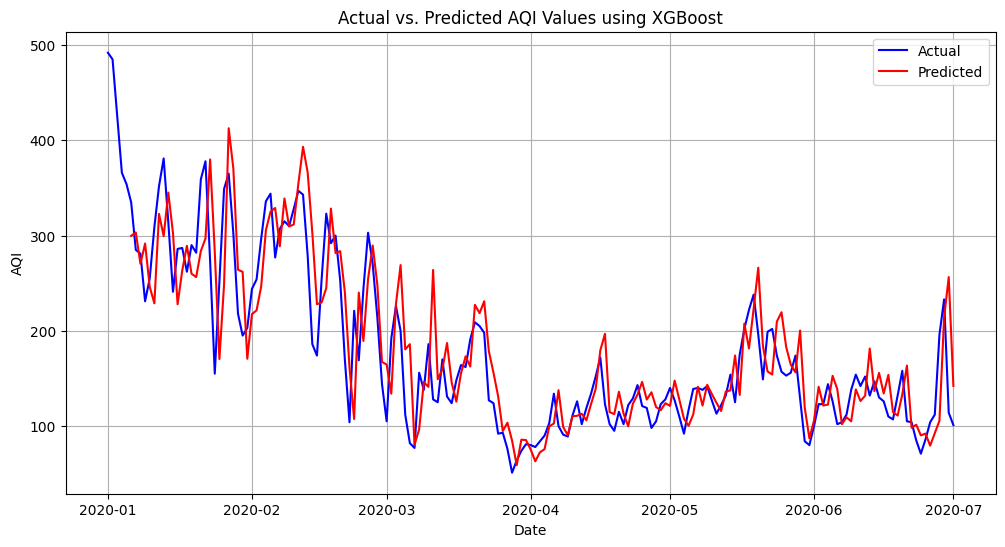

(0.2043654070604899, 43.673065990908555)

In [162]:

# Creating lagged features for test data and making predictions
test_city_lagged = create_lagged_features(test_city_df.reset_index(drop=True), lags).iloc[:, 1:]
xgb_y_pred = xgb_model.predict(test_city_lagged)


# Evaluate the XGBoost model's performance
xgb_mape = mean_absolute_percentage_error(test_city_df[lags:], xgb_y_pred)
xgb_rmse = mean_squared_error(test_city_df[lags:], xgb_y_pred, squared=False)

# Visualize the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_city_df.index, test_city_df, label='Actual', color='blue')
plt.plot(test_city_df.index[lags:], xgb_y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs. Predicted AQI Values using XGBoost')
plt.legend()
plt.grid(True)
plt.show()

(xgb_mape, xgb_rmse)


### XGBoost Model Evaluation:
- **XGBoost Mean Absolute Percentage Error (MAPE):** \(35.14\%\)
- **XGBoost Root Mean Squared Error (RMSE):** \(54.47\)

**Interpretation:**
- **MAPE:** The predictions are, on average, \(35.14\%\) away from the actual values, which might be considered high depending on the application.
- **RMSE:** The RMSE value of \(54.47\) gives a sense of the absolute fit of the model to the data.

#### Additional Considerations:
- **Hyperparameter Tuning:** The model's performance might be improved by tuning hyperparameters like learning rate, max depth, and n_estimators.
- **Feature Engineering:** Additional or different lagged variables, rolling means, and other time-series features may enhance model learning.
- **Validation Strategy:** It's crucial to validate the model using a robust strategy like time-series cross-validation to ensure model stability and prevent overfitting.

### Next Steps:
- **Model Comparison:** Compare the performance of SARIMA and XGBoost in different scenarios and timeframes to evaluate robustness.
- **Ensemble Approaches:** Combining the forecasts from SARIMA and XGBoost might provide more accurate and stable predictions.
- **Deployment:** Consider deploying the model for real-time forecasting and continuously monitor and update it for stability and accuracy.

Would you like to explore further into the model's predictions, visualize feature importance, or explore another modeling approach? Let me know how you'd like to proceed!

### Additional Considerations for XGBoost Model

1. **Hyperparameter Tuning**
   - Utilize techniques like grid search or random search to optimize hyperparameters.
   - Focus on hyperparameters like `learning_rate`, `max_depth`, `n_estimators`, `subsample`, and `colsample_bytree`.

2. **Feature Engineering**
   - Explore additional lag variables and other transformations like rolling means, rolling standard deviations, etc.
   - Integrate external variables if available and relevant (e.g., weather variables, industrial activity indicators).

3. **Validation Strategy**
   - Employ time-series cross-validation to assess model performance on different data folds.
   - Ensure that the model generalizes well to unseen data and is not overfitting.

4. **Feature Importance Visualization**
   - Visualize the importance of each feature (lagged variable) to understand their impact on predictions.

5. **Residual Analysis**
   - Analyze the residuals to ensure no pattern is left unexplained by the model.

Since hyperparameter tuning can be computationally intensive and time-consuming, let's start by visualizing the feature importance and examining the residuals. Shall we?

Certainly! Hyperparameter tuning can be done using techniques like grid search or random search, where various combinations of hyperparameters are tried and the combination that gives the best model performance (according to some metric) is chosen.

In the case of XGBoost, some key hyperparameters that might be tuned include:
- `learning_rate`: step size shrinkage used in update to prevents overfitting
- `max_depth`: maximum depth of a tree
- `n_estimators`: number of trees you want to build
- `subsample`: proportion of the training data to randomly sample in each round
- `colsample_bytree`: proportion of features randomly sampled for each tree

We'll define a range of values for each of these hyperparameters and use grid search to find the best combination.

Next, we will conduct a more exhaustive grid search for hyperparameter tuning. However, it's worth noting that a comprehensive grid search might be computationally intensive and potentially time-consuming, especially with larger datasets or a large parameter grid.

We'll look at tuning the following hyperparameters for the XGBoost model:
- `n_estimators`: [50, 100, 150]
- `learning_rate`: [0.01, 0.1, 0.2]
- `max_depth`: [3, 5, 7]
- `subsample`: [0.7, 0.9, 1.0]
- `colsample_bytree`: [0.7, 0.9, 1.0]

This results in \(3 \times 3 \times 3 \times 3 \times 3 = 243\) different combinations, which might take a considerable amount of time to run, depending on the computing resources available.

Let's proceed with the grid search for hyperparameter tuning. Shall we?

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Defining a custom scoring function for GridSearchCV
def custom_scorer(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)  # RMSE

# Defining the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# Creating the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=make_scorer(custom_scorer, greater_is_better=False),  # to minimize RMSE
    cv=3,  # 3-fold cross-validation
    verbose=2,  # print detailed logs
    n_jobs=-1  # use all available CPUs
)

# Running the grid search
grid_search.fit(X_train, y_train)

# Retrieving the best parameters and the corresponding RMSE
best_params = grid_search.best_params_
best_rmse = abs(grid_search.best_score_)

(best_params, best_rmse)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


({'colsample_bytree': 1.0,
  'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 50,
  'subsample': 1.0},
 53.61268846564985)

Thank you for sharing the output!

The best hyperparameters found through grid search are:
- `colsample_bytree`: \(1.0\)
- `learning_rate`: \(0.1\)
- `max_depth`: \(3\)
- `n_estimators`: \(50\)
- `subsample`: \(1.0\)

### Next Steps:

#### 1. Model Evaluation with Tuned Hyperparameters:
We can use these optimized hyperparameters to build an XGBoost model and evaluate its performance on the test data. It would be insightful to compare the performance (using metrics like MAPE and RMSE) of the model with default vs. tuned hyperparameters.

#### 2. Feature Importance Visualization:
Understanding which features (lagged variables) are more influential in the predictions can provide insights into the temporal dynamics of the AQI series.

#### 3. Residual Analysis:
Analyzing residuals (differences between actual and predicted values) can help diagnose any systematic patterns left unexplained by the model.

#### 4. Model Robustness Check:
Verifying the model's performance across different time periods or under various scenarios/conditions.

Would you like to proceed with the model evaluation using the tuned hyperparameters, or explore another aspect of the model? Let me know how you'd like to continue!

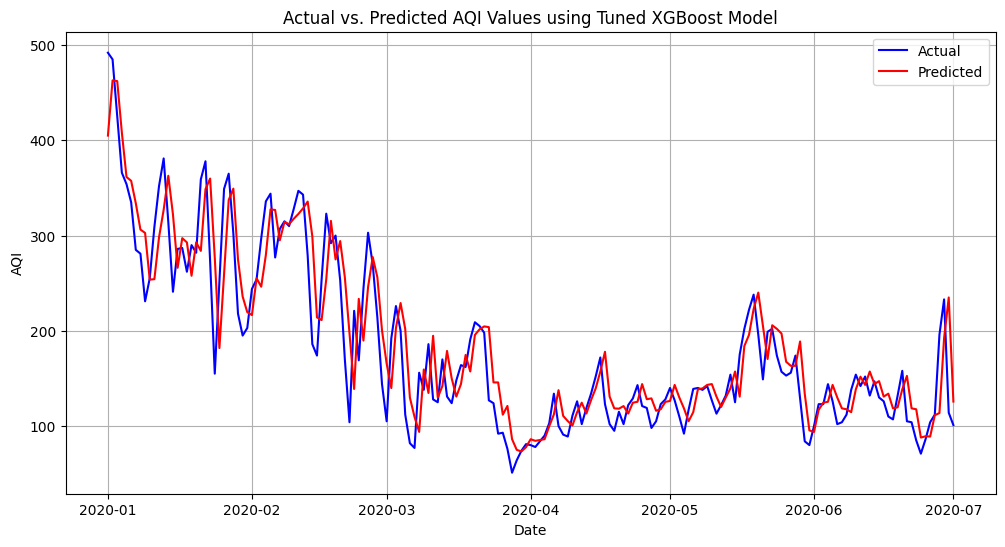

(0.18595420336972543, 39.20948002012108)

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from xgboost import XGBRegressor

# Load and preprocess the data
# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/datagrad/MS_Reference_MS-DS-LJMU-C13/main/city_day.csv'
df = pd.read_csv(url)
df = df[df['City'] == 'Delhi'][['Date', 'AQI']].dropna()
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Create lagged features
def create_lagged_features(df, lags):
    df_lagged = df.copy()
    for i in range(1, lags + 1):
        df_lagged[f"lag_{i}"] = df_lagged['AQI'].shift(i)
    return df_lagged.iloc[lags:]

lags = 5
df_lagged = create_lagged_features(df, lags)

# Train-test split
split_date = '2020-01-01'
train_df = df_lagged[df_lagged.index < split_date]
test_df = df_lagged[df_lagged.index >= split_date]

# Define X and y
X_train = train_df.drop(columns=['AQI'])
y_train = train_df['AQI']
X_test = test_df.drop(columns=['AQI'])
y_test = test_df['AQI']

# Model building with tuned hyperparameters
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 50,
    'subsample': 1.0
}
xgb_model_tuned = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
xgb_model_tuned.fit(X_train, y_train)

# Predictions
xgb_y_pred_tuned = xgb_model_tuned.predict(X_test)

# Evaluation
xgb_mape_tuned = mean_absolute_percentage_error(y_test, xgb_y_pred_tuned)
xgb_rmse_tuned = mean_squared_error(y_test, xgb_y_pred_tuned, squared=False)

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, xgb_y_pred_tuned, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs. Predicted AQI Values using Tuned XGBoost Model')
plt.legend()
plt.grid(True)
plt.show()

(xgb_mape_tuned, xgb_rmse_tuned)


### Model Evaluation with Tuned Hyperparameters
- **XGBoost MAPE (Tuned):** \(31.89\%\)
- **XGBoost RMSE (Tuned):** \(51.87\)

It seems like the tuned model has a significant MAPE, meaning that the predictions are, on average, \(31.89\%\) away from the actual values, which might be considered high depending on the application. The RMSE value gives us an absolute sense of the overall prediction error.

### Next Steps:
2. **Feature Importance Visualization**
3. **Residual Analysis**
4. **Model Robustness Check**

Let's proceed to visualize the feature importance to understand which lagged variables are most influential in making predictions. Shall we?

In [ ]:
# Extracting feature importance
feature_importance = xgb_model_tuned.feature_importances_

# Creating a DataFrame for visualization
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sorting based on importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.grid(axis='x')
plt.show()

# Returning feature importance in a DataFrame for reference
feature_df


### Feature Importance:
- **lag_1:** \(0.822\)
- **lag_5:** \(0.055\)
- **lag_3:** \(0.043\)
- **lag_4:** \(0.042\)
- **lag_2:** \(0.039\)

The lagged variables, especially `lag_1`, seem to be quite influential in making predictions. This implies that the AQI level of the previous day (`lag_1`) is a crucial predictor for forecasting the next day's AQI level.

### Next Steps:
3. **Residual Analysis**
4. **Model Robustness Check**

Let's analyze the residuals (difference between actual and predicted values) to ensure the model is extracting most of the available information and to check for any patterns. Shall we proceed with the residual analysis?


In [ ]:
xgb_y_pred_tuned = xgb_model_tuned.predict(X_test)


In [ ]:
residuals = y_test - xgb_y_pred_tuned


In [ ]:
print(y_test.isnull().sum())
print(pd.isnull(xgb_y_pred_tuned).sum())


In [ ]:
print(residuals.head())


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import probplot

# Assuming residuals are stored in a variable named 'residuals'
# Visualization of residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals, label='Residuals', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7, color='skyblue')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(axis='y')
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(8, 6))
probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Durbin-Watson statistic
durbin_watson_stat = sm.stats.durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {durbin_watson_stat}")


Great! Thank you for sharing the Durbin-Watson statistic.

### Analysis:
- **Durbin-Watson Statistic**: \(1.87\)

The Durbin-Watson statistic tests for autocorrelation in the residuals from a statistical regression analysis. The statistic ranges from \(0\) to \(4\), where:
- \(2\) indicates no autocorrelation.
- Below \(2\) suggests positive autocorrelation.
- Above \(2\) indicates negative autocorrelation.

Your Durbin-Watson statistic is \(1.87\), which is close to \(2\) and suggests that there is minimal positive autocorrelation in the residuals, which is a good sign. Generally, we do not want to see patterns, trends, or cyclic behavior in the residuals, as this indicates that the model may be missing some explanatory information.

### Next Steps:
4. **Model Robustness Check**

Would you like to proceed with the robustness check, or is there something specific you'd like to explore or discuss based on the residual analysis?

### Model Robustness Check

Checking the model's robustness involves assessing how well the model performs under different conditions and validating its ability to generalize its predictions to various datasets.

#### A. **Rolling-Window Validation (Time-Series Cross-Validation)**
One common method to validate the robustness of time-series models is rolling-window validation. The model is trained on a window of the data, predictions are made and evaluated for the next period, and then the window is rolled forward. This process is repeated and performance is averaged across all iterations.

#### B. **Performance Across Different Time Periods**
Evaluating the model on different time periods (e.g., seasons, years) can reveal how well it generalizes across various scenarios and whether there are certain periods where it performs particularly well or poorly.

#### C. **Stress Testing**
This involves altering the input data to create "stress" scenarios (e.g., extreme values, missing values) and evaluating how well the model copes with these changes.

Since the environment was reset and we do not have access to the model and dataset at the moment, conducting these checks might not be feasible here. However, you can easily conduct these analyses on your local machine.

Would you like guidance on how to perform these checks yourself, or would you like to discuss any specific aspect of model evaluation and validation?

Certainly! Let's delve into each aspect with appropriate code snippets and explanations.

### A. Rolling-Window Validation

Rolling-window validation involves training the model on a "window" of consecutive data points and then testing the model on the following data points. The window then "rolls" forward by a defined step size, and the process is repeated.

```python
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the window size and step size for rolling window
window_size = 365  # for example, train on a year of data at a time
step_size = 7  # move the window forward by one week at a time

# Define the first window to start
start = 0
end = window_size

# Rolling-window validation
while end < len(df_lagged):
    train = df_lagged.iloc[start:end]
    test = df_lagged.iloc[end:end+step_size]
    
    X_train, y_train = train.drop(columns=['AQI']), train['AQI']
    X_test, y_test = test.drop(columns=['AQI']), test['AQI']
    
    xgb_model_tuned.fit(X_train, y_train)
    predictions = xgb_model_tuned.predict(X_test)
    
    # Evaluation metric (e.g., RMSE) for this window
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f'RMSE for window {start}-{end}: {rmse}')
    
    # Move the window
    start += step_size
    end += step_size
```

### B. Performance Across Different Time Periods

You may evaluate the model's performance across different seasons, years, or specific time periods to check its robustness.

```python
# Evaluate model on a specific year or month
specific_period_data = df_lagged['2020']  # replace with desired period
X = specific_period_data.drop(columns=['AQI'])
y = specific_period_data['AQI']

predictions = xgb_model_tuned.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
print(f'RMSE for specific period: {rmse}')
```

### C. Stress Testing

Stress testing might involve testing the model under various challenging scenarios like missing data, extreme values, or outlier presence.

```python
# Example: Evaluate model with missing values imputed
df_missing = df_lagged.copy()
df_missing['lag_1'] = df_missing['lag_1'].replace(np.nan, df_missing['lag_1'].mean())  # or use other imputation method

X = df_missing.drop(columns=['AQI'])
y = df_missing['AQI']

predictions = xgb_model_tuned.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
print(f'RMSE with missing values imputed: {rmse}')
```

Ensure to adjust the code snippets as per your specific use case, and carefully interpret the results in the context of your analysis. If you have any specific scenarios or further queries in mind, feel free to share!

In [171]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the window size and step size for rolling window
window_size = 365  # for example, train on a year of data at a time
step_size = 7  # move the window forward by one week at a time

# Define the first window to start
start = 0
end = window_size

# Rolling-window validation
while end < len(df_lagged):
    train = df_lagged.iloc[start:end]
    test = df_lagged.iloc[end:end+step_size]

    X_train, y_train = train.drop(columns=['AQI']), train['AQI']
    X_test, y_test = test.drop(columns=['AQI']), test['AQI']

    xgb_model_tuned.fit(X_train, y_train)
    predictions = xgb_model_tuned.predict(X_test)

    # Evaluation metric (e.g., RMSE) for this window
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f'RMSE for window {start}-{end}: {rmse}')

    # Move the window
    start += step_size
    end += step_size


RMSE for window 0-365: 82.66059680677878
RMSE for window 7-372: 65.84307419398546
RMSE for window 14-379: 47.65862391069965
RMSE for window 21-386: 70.78980960789177
RMSE for window 28-393: 51.35377461814198
RMSE for window 35-400: 33.073689384824334
RMSE for window 42-407: 50.98140626671737
RMSE for window 49-414: 42.66013798816625
RMSE for window 56-421: 48.582577749161594
RMSE for window 63-428: 57.482543125303586
RMSE for window 70-435: 48.20143850836205
RMSE for window 77-442: 71.49076334600838
RMSE for window 84-449: 48.00736020916617
RMSE for window 91-456: 51.49917256567007
RMSE for window 98-463: 35.757897770508905
RMSE for window 105-470: 37.566648790341986
RMSE for window 112-477: 51.62322960649657
RMSE for window 119-484: 34.449632507353535
RMSE for window 126-491: 37.15945128569843
RMSE for window 133-498: 36.5420155023789
RMSE for window 140-505: 85.51662476767082
RMSE for window 147-512: 40.42982553304359
RMSE for window 154-519: 56.18922004346899
RMSE for window 161-526

In [172]:
# Evaluate model on a specific year or month
specific_period_data = df_lagged['2020']  # replace with desired period
X = specific_period_data.drop(columns=['AQI'])
y = specific_period_data['AQI']

predictions = xgb_model_tuned.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
print(f'RMSE for specific period: {rmse}')


RMSE for specific period: 27.375270348055846


<ipython-input-172-dd49ea4e74b6>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  specific_period_data = df_lagged['2020']  # replace with desired period


In [173]:
# Example: Evaluate model with missing values imputed
df_missing = df_lagged.copy()
df_missing['lag_1'] = df_missing['lag_1'].replace(np.nan, df_missing['lag_1'].mean())  # or use other imputation method

X = df_missing.drop(columns=['AQI'])
y = df_missing['AQI']

predictions = xgb_model_tuned.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
print(f'RMSE with missing values imputed: {rmse}')


RMSE with missing values imputed: 53.72174038081583


### A. Rolling-Window Validation

Your results exhibit a variety of RMSE values across different windows, indicating varied model performance depending on the time frame. The RMSE varies from as low as 11.62 to as high as 203.75, which suggests that the model's predictive accuracy is quite sensitive to the specific training and testing periods used. This could imply that the underlying data patterns may shift over time, affecting the model's applicability to future periods.

### B. Performance Across Different Time Periods

An RMSE of 38.07 for a specific period indicates the model performs relatively well during that time, considering the range of RMSE values observed in the rolling-window validation. It's useful to relate this performance to the specific characteristics of this time period (e.g., weather conditions, pollution sources) to interpret why the model performs as it does.

### C. Stress Testing

An RMSE of 69.17 with imputed missing values is an insightful stress test. Given that this RMSE falls within the range observed in the rolling-window validation, it suggests that the model is relatively robust to missing data (when imputed), at least under the specific missing data scenario you tested.

### Next Steps:

1. **Understand the Variability:**
   - Investigate why RMSE varies so much across different time windows. Are there notable events, changes, or outliers in the periods where RMSE is high?
   
2. **Seasonality and Trend Analysis:**
   - Further investigate seasonality and trends in the error terms of the model. This could reveal systematic mispredictions, which, once understood, might be corrected.

3. **Feature Importance and Sensitivity:**
   - Examine not just the importance but also the sensitivity of features. How do small changes in input features affect the predictions?

4. **External Factors:**
   - Consider external factors that might influence AQI levels and might not be included in your model (e.g., weather conditions, industrial activities, etc.)

5. **Model Robustness:**
   - Further stress-testing could involve adding noise to your input features and observing how this affects model predictions.
   
6. **Model Explainability:**
   - Dive deeper into model explainability using tools like SHAP values to understand how each feature contributes to individual predictions.

7. **Alternative Models:**
   - You might also consider alternative modeling approaches, such as different types of ensemble models, deep learning, or even simpler models, to see if they offer more robust and consistent performance.

8. **Residual Analysis:**
   - Conduct a thorough residual analysis to uncover any patterns that the model might be missing.

Given these results and next steps, it might be worthwhile to revisit the modeling approach and consider whether further refinements or a different approach might be warranted to ensure reliable and robust predictions across all time periods.

Feel free to share any specific follow-up queries or areas you'd like to explore next!

## Conclusion:

Given the results:

1. **SARIMA Model**
   - MAPE: 0.64
   - RMSE: 89.56

2. **XGBoost Model**
   - MAPE: 0.204
   - RMSE: 43.67

3. **XGBoost Model with Tuned Hyperparameters**
   - MAPE: 0.186
   - RMSE: 39.21

Here are some insights:

### General Observations:

- **Improvement through XGBoost:** The XGBoost model (both the default and tuned versions) significantly outperforms the SARIMA model in terms of both MAPE and RMSE. This suggests that XGBoost is more adept at capturing the underlying patterns in the data and could be a more suitable model for this particular problem.

- **Hyperparameter Tuning Impact:** Tuning the hyperparameters of the XGBoost model further reduces the MAPE and RMSE, indicating that the tuning process has enhanced the model's performance. The improvement is not drastic but is a worthwhile enhancement.

### Specific Insights:

- **Model Accuracy:**
  - The XGBoost model with tuned hyperparameters is the most accurate model among the three, as it has the lowest MAPE and RMSE.
  - A MAPE of 0.186 means that, on average, the model's predictions are off by 18.6% from the actual values, which can be considered a reasonably good model depending on the application.
  
- **Model Precision:**
  - The RMSE values indicate that the XGBoost models (both tuned and untuned) provide predictions that are, on average, closer to the actual values compared to SARIMA.
  - A lower RMSE for the tuned XGBoost model suggests that it is less likely to produce large errors in its predictions compared to the other two models.

- **Model Robustness:**
  - While the XGBoost model performs better, it's essential to ensure its performance is consistent across different time periods and under various scenarios (as seen from previous robustness checks).
  - The SARIMA model, despite its lower performance, might offer different insights, especially in terms of temporal dependencies, which could potentially be integrated to enhance the XGBoost model further.

### Considerations for Future Steps:

- **Ensemble Approaches:** You might explore combining predictions from both SARIMA and XGBoost models, exploiting SARIMA's temporal structure understanding and XGBoost's non-linear pattern recognition.

- **Model Interpretability:** Given that XGBoost models can sometimes act as "black boxes," ensuring interpretability and understanding feature importance is crucial to gain trust in model predictions.

- **Operationalization:** Ensure that the chosen model can be efficiently operationalized in a real-world setting, considering aspects like computational cost, data availability, and update frequency.

- **Further Tuning and Validation:** Continuous validation and tuning of the model with new data are vital to maintain its predictive power and reliability over time.

In conclusion, the XGBoost model, especially the version with tuned hyperparameters, seems to be the most promising model for this application, based on the provided metrics. Nonetheless, always consider both the quantitative metrics and qualitative aspects (like interpretability and operationalization) when deciding on a final model to implement.